# Correlation between S&P500 and Ibov

### The idea is to test whether or not a deep crisis in the US stock market could spillover to Brazil stock market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#!pip install yfinance

In [15]:
tickers = ['IVVB11.SA', 'BOVA11.SA']

In [41]:
data = yf.download(tickers, start='2020-03-01', end='2022-07-29', parse_dates=["Date"])

[*********************100%***********************]  2 of 2 completed


In [42]:
data

Adj Close                   Close                    High  \
             BOVA11.SA   IVVB11.SA   BOVA11.SA   IVVB11.SA   BOVA11.SA   
Date                                                                     
2020-03-02  102.989998  148.630005  102.989998  148.630005  103.379997   
2020-03-03  101.750000  145.399994  101.750000  145.399994  105.269997   
2020-03-04  103.099998  154.000000  103.099998  154.000000  103.989998   
2020-03-05   98.790001  150.050003   98.790001  150.050003  102.099998   
2020-03-06   94.400002  147.720001   94.400002  147.720001   95.839996   
...                ...         ...         ...         ...         ...   
2022-07-22   95.419998  238.839996   95.419998  238.839996   96.160004   
2022-07-25   96.750000  233.750000   96.750000  233.750000   96.930000   
2022-07-26   96.150002  230.500000   96.150002  230.500000   97.160004   
2022-07-27   97.830002  231.649994   97.830002  231.649994   97.940002   
2022-07-28   99.099998  230.800003   99.099998  230.800003   99.099998   

                               Low                    Open              \
             IVVB11.SA   BOVA11.SA   IVVB11.SA   BOVA11.SA   IVVB11.SA   
Date                                                                     
2020-03-02  148.630005   99.900002  141.559998  100.849998  141.800003   
2020-03-03  150.669998  100.500000  144.460007  102.959999  149.000000   
2020-03-04  154.000000  101.099998  147.789993  103.989998  148.679993   
2020-03-05  153.889999   96.769997  149.389999  102.000000  152.490005   
2020-03-06  147.880005   93.320000  144.360001   94.820000  146.179993   
...                ...         ...         ...         ...         ...   
2022-07-22  239.229996   94.820000  236.419998   95.790001  238.979996   
2022-07-25  236.869995   96.029999  232.070007   96.309998  236.869995   
2022-07-26  233.050003   95.849998  229.300003   96.879997  232.509995   
2022-07-27  232.809998   96.459999  229.059998   96.769997  230.520004   
2022-07-28  233.570007   97.419998  227.550003   98.010002  229.419998   

              Volume            
           BOVA11.SA IVVB11.SA  
Date                            
2020-03-02   9062780    679520  
2020-03-03  14633620    651200  
2020-03-04   8364790    653140  
2020-03-05  10128930    318130  
2020-03-06  25135520    386670  
...              ...       ...  
2022-07-22   5037163    294860  
2022-07-25   4192244    263109  
2022-07-26   4780077    349530  
2022-07-27   4846166    478061  
2022-07-28   6764647    387696  

[599 rows x 12 columns]

## Cleaning and Preparation 

In [43]:
# Let's get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 599 entries, 2020-03-02 to 2022-07-28
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, BOVA11.SA)  599 non-null    float64
 1   (Adj Close, IVVB11.SA)  599 non-null    float64
 2   (Close, BOVA11.SA)      599 non-null    float64
 3   (Close, IVVB11.SA)      599 non-null    float64
 4   (High, BOVA11.SA)       599 non-null    float64
 5   (High, IVVB11.SA)       599 non-null    float64
 6   (Low, BOVA11.SA)        599 non-null    float64
 7   (Low, IVVB11.SA)        599 non-null    float64
 8   (Open, BOVA11.SA)       599 non-null    float64
 9   (Open, IVVB11.SA)       599 non-null    float64
 10  (Volume, BOVA11.SA)     599 non-null    int64  
 11  (Volume, IVVB11.SA)     599 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 60.8 KB


In [44]:
data['Close'].describe()

,BOVA11.SA,IVVB11.SA
count,599.000000,599.000000
mean,103.431924,224.347930
std,12.694129,36.408920
min,61.139999,124.000000
25%,96.660000,204.449997
50%,104.900002,228.470001
75%,113.061768,248.964996
max,125.750000,297.750000


In [45]:
# Finding missing values
data.isna().sum().sort_values(ascending=False)

Adj Close  BOVA11.SA    0
           IVVB11.SA    0
Close      BOVA11.SA    0
           IVVB11.SA    0
High       BOVA11.SA    0
           IVVB11.SA    0
Low        BOVA11.SA    0
           IVVB11.SA    0
Open       BOVA11.SA    0
           IVVB11.SA    0
Volume     BOVA11.SA    0
           IVVB11.SA    0
dtype: int64

In [46]:
# Let's get these numbers as a percentage of the total
miss_per = data.isna().sum().sort_values(ascending=False) / len(data) * 100

miss_per

Adj Close  BOVA11.SA    0.0
           IVVB11.SA    0.0
Close      BOVA11.SA    0.0
           IVVB11.SA    0.0
High       BOVA11.SA    0.0
           IVVB11.SA    0.0
Low        BOVA11.SA    0.0
           IVVB11.SA    0.0
Open       BOVA11.SA    0.0
           IVVB11.SA    0.0
Volume     BOVA11.SA    0.0
           IVVB11.SA    0.0
dtype: float64

In [47]:
data_1 = data.dropna()

In [48]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 599 entries, 2020-03-02 to 2022-07-28
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, BOVA11.SA)  599 non-null    float64
 1   (Adj Close, IVVB11.SA)  599 non-null    float64
 2   (Close, BOVA11.SA)      599 non-null    float64
 3   (Close, IVVB11.SA)      599 non-null    float64
 4   (High, BOVA11.SA)       599 non-null    float64
 5   (High, IVVB11.SA)       599 non-null    float64
 6   (Low, BOVA11.SA)        599 non-null    float64
 7   (Low, IVVB11.SA)        599 non-null    float64
 8   (Open, BOVA11.SA)       599 non-null    float64
 9   (Open, IVVB11.SA)       599 non-null    float64
 10  (Volume, BOVA11.SA)     599 non-null    int64  
 11  (Volume, IVVB11.SA)     599 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 60.8 KB


In [49]:
Close_Price = data_1['Close']
Close_Price

,BOVA11.SA,IVVB11.SA
Date,,
2020-03-02,102.989998,148.630005
2020-03-03,101.750000,145.399994
2020-03-04,103.099998,154.000000
2020-03-05,98.790001,150.050003
2020-03-06,94.400002,147.720001
...,...,...
2022-07-22,95.419998,238.839996
2022-07-25,96.750000,233.750000
2022-07-26,96.150002,230.500000


In [50]:
Close_Price.describe()

,BOVA11.SA,IVVB11.SA
count,599.000000,599.000000
mean,103.431924,224.347930
std,12.694129,36.408920
min,61.139999,124.000000
25%,96.660000,204.449997
50%,104.900002,228.470001
75%,113.061768,248.964996
max,125.750000,297.750000


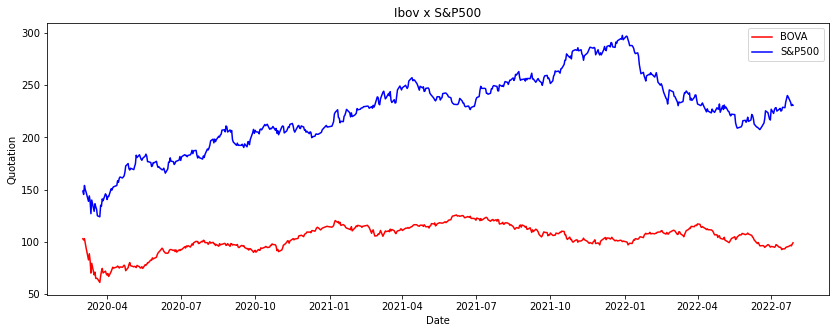

In [51]:
plt.figure(figsize=(14,5))
plt.plot(Close_Price['BOVA11.SA'], color = 'red', label = 'BOVA')
plt.plot(Close_Price['IVVB11.SA'], color = 'blue', label = 'S&P500')
plt.title('Ibov x S&P500')
plt.xlabel('Date')
plt.ylabel('Quotation')
plt.legend()
plt.show()

In [39]:
Close_Price.isna().sum().sort_values(ascending=False)

BOVA11.SA    0
IVVB11.SA    0
dtype: int64

In [52]:
Close_Price['BOVA11.SA'].corr(Close_Price['IVVB11.SA'])

0.6237081927032776

In [ ]:
# There is a moderate correlation between the S&P500 and the Ibovespa 

## Granger Causality test

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(Close_Price[['BOVA11.SA', 'IVVB11.SA']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9306  , p=0.0479  , df_denom=595, df_num=1
ssr based chi2 test:   chi2=3.9505  , p=0.0469  , df=1
likelihood ratio test: chi2=3.9375  , p=0.0472  , df=1
parameter F test:         F=3.9306  , p=0.0479  , df_denom=595, df_num=1


{1: ({'ssr_ftest': (3.9306476810698667, 0.04787317931900441, 595.0, 1),
   'ssr_chi2test': (3.9504660727391268, 0.046858387937486444, 1),
   'lrtest': (3.9374746095686532, 0.04722161678448276, 1),
   'params_ftest': (3.930647681062539, 0.04787317931921257, 595.0, 1.0)},
   array([[0., 1., 0.]])])}

In [58]:
# According to Granger causality test we can reject the H0 in favour of HI with 95% of confidence level

# H0 = Time series S&P500 does not Granger-cause time series Ibovespa
# HI = Time series S&P500 Granger-causes time series Ibovespa

